<a href="https://colab.research.google.com/github/a01137646/MNA_Public/blob/main/Inteligencia%20artificial%20y%20aprendizaje%20autom%C3%A1tico/MNA_IAyAA_semana_6_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   Gerardo Aaron Castañeda Jaramillo - A01137646
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [51]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score         

from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold 

from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

from sklearn.model_selection import GridSearchCV

# To create our Decision Tree Graph:
from sklearn import tree
import pydotplus 
from IPython.display import Image

#**Ejercicio-1.** 

1.   Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como se indica en la página de la UCI.  



Convertimos la base de datos a una dataframe

In [52]:
df = pd.read_csv('https://github.com/a01137646/MNA_Public/blob/main/Inteligencia%20artificial%20y%20aprendizaje%20autom%C3%A1tico/SouthGermanCredit.asc?raw=true',delimiter =" ")

Cambiamos los nombres de las columnas a nombres en ingles

In [53]:
df.rename(columns = {'laufkont':'status', 'laufzeit':'duration', 'moral':'credit_history', 'verw':'purpose', 'hoehe':'amount', 'sparkont':'savings', 'beszeit':'employment_duration', 
                     'rate':'installment_rate', 'famges':'personal_status_sex', 'buerge':'other_debtors', 'wohnzeit':'present_residence', 'verm':'property', 'alter':'age', 
                     'weitkred':'other_installment_plans', 'wohn':'housing', 'bishkred':'number_credits', 'beruf':'job', 'pers':'people_liable', 'telef':'telephone', 'gastarb':'foreign_worker',
                     'kredit':'credit_risk'}, inplace = True)
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


Vemos que no existan valores nulos o de tipo object

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

#**Ejercicio-2.**

2. Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 15%. Los modelos se estarán entrenando con el método de validación cruzada, así que no es necesario en este paso generar el conjunto de validación. Define como la variable X a todas las 
variables de entrada y a la variable Y como la variable de salida.

Separamos los valores X de los valores de Y

In [230]:
Y = df['credit_risk']
X = df.drop('credit_risk',axis=1)

1    700
0    300
Name: credit_risk, dtype: int64

Hacemos una partición de los valores, 85% para entrenamiento, y 15% para pruebas

In [83]:
Xtv, Xtest, ytv, ytest = train_test_split(X, Y, train_size=0.85, test_size=0.15, random_state=1)  
print(Xtv.shape, ': dimensión de datos de entrada de entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada de prueba')  
print(ytv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')

(850, 20) : dimensión de datos de entrada de entrenamiento y validación
(150, 20) : dimensión de datos de entrada de prueba
(850,) : dimensión de variable de salida para entrenamiento y validación
(150,) : dimensión de variable de salida para prueba


#**Ejercicio-3.**

3. Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de  cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal  (discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha  información realiza un Pipeline que incluya al menos las siguientes transformaciones:


* Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable (decide y justifica que tipo de imputación realizas en cada caso).

* Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una transformación que escale a todas ellas en un rango equiparable. 

* Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique  la transformación one-hot encoding. Por el momento dejar las variables ordinales sin transformar. 

Creamos listas con los nombres de las columnas dependiendo de su tipo de datos

In [85]:
#valores numéricos
num_nombres = ['duration','amount','age']
#valores categóricos
cat_nombres = ['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing']
#valores ordinales
ord_nombres = ['employment_duration','installment_rate','present_residence','property','number_credits','job']
#valores binarios
bin_nombres = ['people_liable','telephone','foreign_worker']

Observamos si existen valores nulos que necesiten imputación

In [9]:
df.isnull().values.any()

False

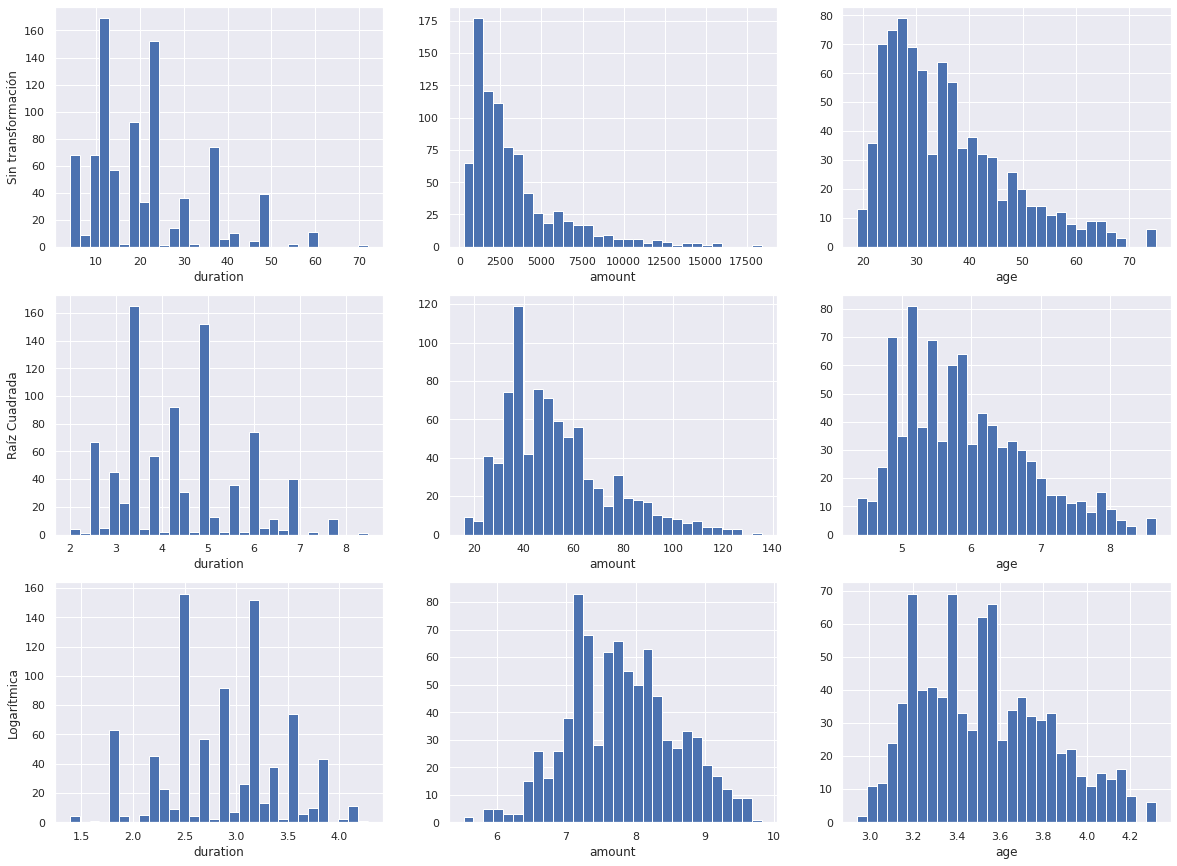

In [56]:
#Graficamos las 3 variables numéricas en histogramas para ver sus distribuciones actuales, y si se les aplica algún tipo de transformación
sns.set(rc={'figure.figsize':(20,15)})
k=0
fig, axes = plt.subplots(3, 3)   
for k in range(0,3):  
  plt.subplot(3,3,k+1) 

  Transf0 = Xtv[num_nombres].iloc[:,k].to_numpy().reshape(-1, 1) 
  plt.hist(Transf0, bins=30) 
  plt.xlabel(num_nombres[k])
  if k==0:
    plt.ylabel('Sin transformación')
  
  plt.subplot(3,3,k+4)    
  Transf1 = np.sqrt(Transf0)       
  plt.hist(Transf1, bins=30)                      
  plt.xlabel(num_nombres[k])
  if k==0:
    plt.ylabel('Raíz Cuadrada')

  plt.subplot(3,3,k+7)    
  Transf2 = np.log(Transf0)       
  plt.hist(Transf2, bins=30)                   
  plt.xlabel(num_nombres[k])
  if k==0:
    plt.ylabel('Logarítmica')

Observamos que la que nos da distribuciones más centralizadas es la transformación logarítmica

Aunque no existen valores nulos, por fines del ejercicio, aplicaremos al pipeline métodos de imputación como si existieran. Utilizamos el método de imputar por la media en los valores numéricos. Así la media de cada variable se mantiene, y aunque se reduciría la desviación estándar un poco, podemos hacerlo asumiendo que los valores faltantes sean muy pocos comparados con el total de estos. Mientras que, para las variables categóricas, imputamos la moda. Esta representa el valor mas frecuente en cada variable, por lo que es valido utilizarlo. 

De igual manera, para los valores numéricos, se utiliza el método de MinMaxScaler para transformarlos a un rango entre 0 y 1. Mientras que para los valores categóricos y binarios se utiliza one-hot encoder, lo cual los transforma los categóricos a variables dummies con valores de 0 y 1, y las binarias de igual manera, a valores de 0 y 1. Lo que finalmente nos deja todas las variables en la misma magnitud. 

In [86]:
# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='mean')),
                                 ('sqrt', FunctionTransformer(np.log)),
                                 ('escalaNum', MinMaxScaler(feature_range=(0, 1)))]) 
num_pipeline_nombres = num_nombres

# Transformaciones a factores categóricos de entrada:
catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
catImp_pipeline_nombres = cat_nombres

# Transformaciones one-hot-encoder en algunas de las categóricas:
catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder())])
catOHE_pipeline_nombres = cat_nombres + bin_nombres

# Conjuntamos las transformaciones que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catimp', catImp_pipeline, catImp_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')

#**Ejercicio-4.**

4. Llevarás un entrenamiento usando validación cruzada entre los siguientes tres modelos de aprendizaje automático: Regresión Logística, Árbol de Decisión y Bosque Aleatorio. Deberás llevar a cabo el entrenamiento de los tres de manera conjunta usando un ciclo FOR. Recuerda aplicar las transformaciones que definiste en tu Pipeline. El entrenamiento debe ser con las siguientes características: 

* Usa los parámetros predeterminados de cada modelo.

In [41]:
#creamos una función para obtener los modelos a utilizar
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  #el parametro default de solver es lbfgs, pero llega al numero maximo de iteraciones
  modelos.append(LogisticRegression(solver='liblinear'))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')
  
  # RF - Bosque Aleatorio:
  modelos.append(RandomForestClassifier())
  nombres.append('RF')

  return modelos, nombres

* En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision, recall, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn. Sin embargo, sí puedes usar la información regresada por el método confusion_matrix() de scikit-learn para definir las métricas).

In [43]:
#Creamos las funciones para obtener las métricas
def mi_accuracy(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel() 
  return (tp + tn)/(tp + tn + fp + fn)

def mi_precision(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel() 
  return tp/(tp+fp)

def mi_recall(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel() 
  return tp/(tp+fn)

def mi_f1score(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel() 
  return tp/(tp + (1/2)*(fp + fn))

def mi_gmean(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  recall = tp/(tp+fn)
  specificity = tn/(tn+fp)
  return np.sqrt(recall*specificity)

Función para ver la matriz de confusión

In [136]:
def mi_cm(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)

  txt = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']
  vf = [ '( VN )', '( FP )', '( FN )', '( VP )']
  frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
  porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

  labels = [f"{v1}\n{v2}\n{v3}\n{v4}" for v1, v2, v3, v4 in zip(txt,vf, frecuencia,porcentaje)]
  labels = np.asarray(labels).reshape(2,2)

  plt.figure(figsize=(6,4))
  ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Spectral', cbar=False)
  ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
  plt.show()

* Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones. 
* Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la métrica “recall”. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu respuesta. 

In [87]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()   

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0) #indicamos las 5 particiones y las 3 repeticiones

for i in range(len(modelos)):     #iteramos para cada modelo

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  mismetricas = {'accuracy':make_scorer(mi_accuracy), 'precision':make_scorer(mi_precision), 'recall':make_scorer(mi_recall), 'f1score':make_scorer(mi_f1score), 'gmean':make_scorer(mi_gmean)}

  resultadosOU = cross_validate(pipeline, Xtv, ytv, scoring=mismetricas, cv=cv)
  resultados.append(resultadosOU)

  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean f1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_accuracy']),
                                                                          np.std(resultadosOU['test_accuracy']), 
                                                                          np.mean(resultadosOU['test_precision']),
                                                                          np.std(resultadosOU['test_precision']),
                                                                          np.mean(resultadosOU['test_recall']),
                                                                          np.std(resultadosOU['test_recall']),
                                                                          np.mean(resultadosOU['test_f1score']),
                                                                          np.std(resultadosOU['test_f1score']),
                                                                          np.mean(resultadosOU['test_gmean']),
                                                                          np.std(resultadosOU['test_gmean']),
                                                                          ))

LR:
mean Accuracy: 0.754 (0.0220)
mean Precision: 0.797 (0.0197)
mean Recall: 0.869 (0.0274)
mean f1score: 0.831 (0.0154)
Gmean: 0.651 (0.0406)

DT:
mean Accuracy: 0.690 (0.0333)
mean Precision: 0.785 (0.0265)
mean Recall: 0.766 (0.0366)
mean f1score: 0.775 (0.0252)
Gmean: 0.627 (0.0481)

RF:
mean Accuracy: 0.762 (0.0223)
mean Precision: 0.797 (0.0154)
mean Recall: 0.883 (0.0244)
mean f1score: 0.838 (0.0160)
Gmean: 0.653 (0.0321)



Graficamos los boxplots de la métrica recall para cada modelo

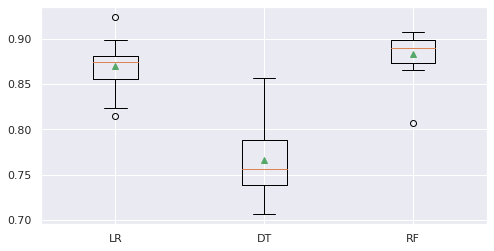

In [88]:
sns.set(rc={'figure.figsize':(8,4)})

bprecall = list()
for i in range(len(resultados)):
  rr = resultados[i]['test_recall']
  bprecall.append(rr)

plt.boxplot(bprecall, labels=nombres, showmeans=True)

plt.show()

Lo primero a observar es que la métrica de recall nos da mejor valor que las demás métricas en los 3 modelos. Así mismo, el modelo que nos da mejor valor de recall, aunque por solo 0.012, es el de Random Forest. Mientras que el que tiene menor valor es el de Decision Tree. 

Al ver las cajas de bigote, vemos que efectivamente, los que tienen menor variación son el modelo de random forest y el de regresión logística. Mientras que el de decision tree tiene un poco mas de variación. Igualmente, podemos ver que el modelo de regresión logística tiene valores atípicos.

A primera vista, el segundo modelo esta subentrenado. Sin embargo, esto no nos da suficiente información para concluir. Veamos lo siguientes puntos del ejercicio para ver cada modelo más da detalle.

* En particular obtengamos algunas de las llamadas curvas de aprendizaje para algunos de estos casos. En dada gráfico debes incluir tus comentarios sobre el modelo generado: 

I. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión Logística con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del 
desempeño de dicha función “learning_curve()”.  

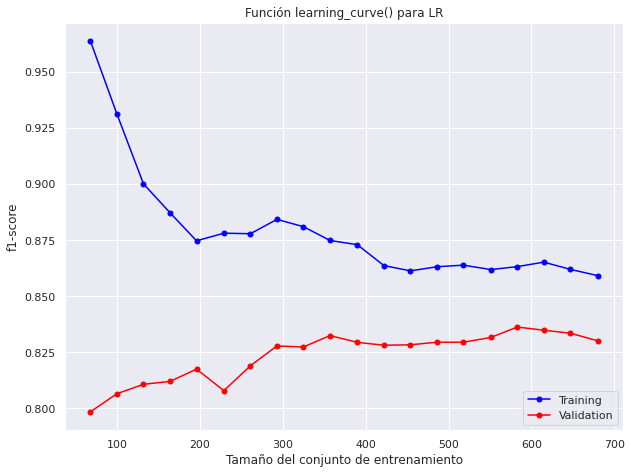

In [89]:
#obtenemos el modelo y los parametros de cross validation
modeloLC = modelos[0]
cvLC = cv
#definimos los al menos 20 puntos de particion
delta_train_sz = np.linspace(0.1, 1.0, 20)

#obtenemos los datos de X transformados
Xx = columnasTransformer.fit_transform(Xtv)

#obtenemos la learning curve
train_sizes, train_scores, valid_scores = learning_curve(estimator=modeloLC, 
                                                        X=Xx, 
                                                        y=np.ravel(ytv),
                                                        cv=cvLC, 
                                                        train_sizes=delta_train_sz,
                                                        scoring=make_scorer(mi_f1score))

# Obtengamos la gráfica de las curvas de aprendizaje 
# cuando se incrementa el tamaño de la muestra:

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

sns.set(rc={'figure.figsize':(10,7.5)})

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')

plt.plot(train_sizes, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función learning_curve() para ' + str(nombres[0]))
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('f1-score')
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

Observamos que el sesgo evitable incrementa con el incremento del conjunto de entrenamiento, pero que termina por estabilizarse. Así mismo, observamos que la curva de training y de validation terminan con una varianza cercana al 0.025, lo cual se considera un valor valido para el modelo. Mientras que el valor de f1-score se mantiene entonces arriba del 0.825. 

II. Obtener las curvas de validación (validation_curve) en la cual se va incrementando la complejidad del hiperparámetro “max_depth” para el modelo de árbol de decisión con sus hiperparámetros predeterminados. Utilizar valores de máxima profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del desempeño del modelo.    

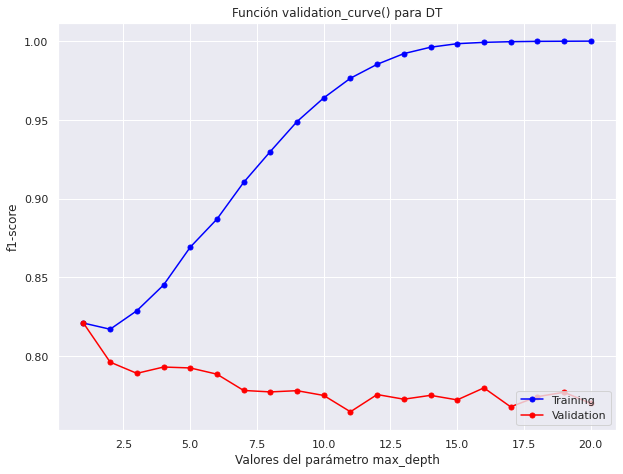

In [90]:
#obtenemos el modelo y los parametros de cross validation
modeloVC = modelos[1]
cvVC = cv

delta_max_depth = np.linspace(1, 20, 20)

train_scores, valid_scores = validation_curve(modeloVC, 
                                              Xx, 
                                              np.ravel(ytv), 
                                              param_name="max_depth", 
                                              param_range=delta_max_depth,
                                              cv=cvVC,
                                              scoring=make_scorer(mi_f1score))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_max_depth, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_max_depth, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función validation_curve() para ' + str(nombres[1]))
plt.xlabel('Valores del parámetro max_depth')
plt.ylabel('f1-score')
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

Lo primero a observar es que la curva de training entre mayor el parámetro de max_depth, mayor su f1-score, al punto de llegar a 1 en max_depth 15. Esto nos dice que entre mayor el max_depth, mayor su sobreentrenamiento. La curva de validation comienza a disminuir un poco al inicio, pero se mantiene relativamente constante al incrementar el max_depth. Lo que nos dice que para el modelo su max_depth no tiene sentido que sea mayor a 3. 

III. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión bosque aleatorio (random forest) con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “recall”, como evaluación del desempeño del modelo.

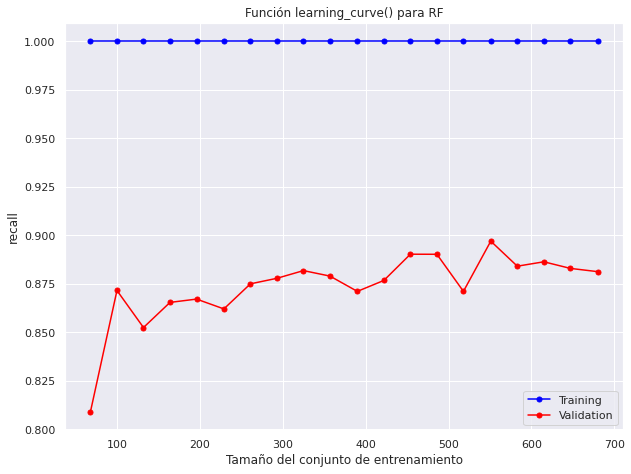

In [91]:
#obtenemos el modelo y los parametros de cross validation
modeloLC = modelos[2]
cvLC = cv
#definimos los al menos 20 puntos de particion
delta_train_sz = np.linspace(0.1, 1.0, 20)

#obtenemos la learning curve
train_sizes, train_scores, valid_scores = learning_curve(estimator=modeloLC, 
                                                        X=Xx, 
                                                        y=np.ravel(ytv),
                                                        cv=cvLC, 
                                                        train_sizes=delta_train_sz,
                                                        scoring=make_scorer(mi_recall))

# Obtengamos la gráfica de las curvas de aprendizaje 
# cuando se incrementa el tamaño de la muestra:

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')

plt.plot(train_sizes, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función learning_curve() para ' + str(nombres[2]))
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('recall')
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

Observamos que la curva de training se mantiene constantemente en 1. Mientras que la de validación se mantiene ligeramente en incremento entre mayor el conjunto de entrenamiento. Esto nos dice que el modelo de random forest esta sobrentrenando con los parámetros de default, y al momento de validar se confirma que efectivamente el modelo no arroja la métrica de 1. 

#**Ejercicio-5.**

5. Finalmente veamos la manera de mejorar los valores de los hiperparámetros de cada modelo, así como el problema del sobreentrenamiento de algunos de ellos. Para ello deberás usar el método GridSearchCV() de scikit-learn. Recuerda que este método hace una búsqueda de los mejores hiperparámetros de un modelo mediante el llamada formato de malla y aplicando validación cruzada. En cada caso puedes incrementar el máximo de iteraciones,”max_iter” para que tengas 
la convergencia adecuada para todas las combinaciones en cada modelo. Recuerda también aplicar las transformaciones que definiste en tu Pipeline. Para fines de este ejercicio se ha seleccionado para cada modelo una métrica diferente, que permita irte familiarizando con ellas. Puedes consultar su documentación de GridSearchCV en la siguiente liga:  
[https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html  ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

a)  Para el modelo de regresión logística realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty. En este caso deberás usar la métrica (scoring) “f1-score”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica f1. ¿Cuál es la utilidad de la métrica “f1-score”? Incluye tus conclusiones. 

NOTA: Toma en cuenta que no todas las combinaciones de “solver” y “penalty” son 
posibles, para que lo tomes en cuenta al momento de realizar la búsqueda. Revisa la 
documentación. 

In [92]:
#obtenemos el modelo y los parametros
modeloLR_iter = LogisticRegression(max_iter=10000, random_state=1)
cvLR = cv

#penalty none no toma en cuenta valores de C
#penalty eslasticnet usa l1_ratio, y daba error sobre que asignaba (l1_ratio=None)
dicc_grid = [
            {'C':[0.0001,0.01,0.1,1.0,10.,100.], 'class_weight':['balanced', None],
             'solver':['newton-cg','lbfgs','sag'],'penalty':['l2']},
            {'C':[0.0001,0.01,0.1,1.0,10.,100.], 'class_weight':['balanced', None],
             'solver':['liblinear','saga'],'penalty':['l1','l2']},    
            {'class_weight':['balanced', None],'penalty':['none'],
             'solver':['newton-cg','lbfgs','sag','saga']}            
            ]
             
grid = GridSearchCV(estimator=modeloLR_iter, 
                    param_grid=dicc_grid, 
                    cv=cvLR, 
                    scoring=make_scorer(mi_f1score),
                    error_score='raise')

In [93]:
# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(Xtv)

grid.fit(Xx, np.ravel(ytv))

print('Mejor valor de f1-score obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de f1-score obtenido con la mejor combinación: 0.8384459633556591
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Métrica utilizada: make_scorer(mi_f1score)


b) Con los mejores valores de los hiperparámetros encontrados con la métrica “f1-score” para el modelo de regresión logística, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento. 

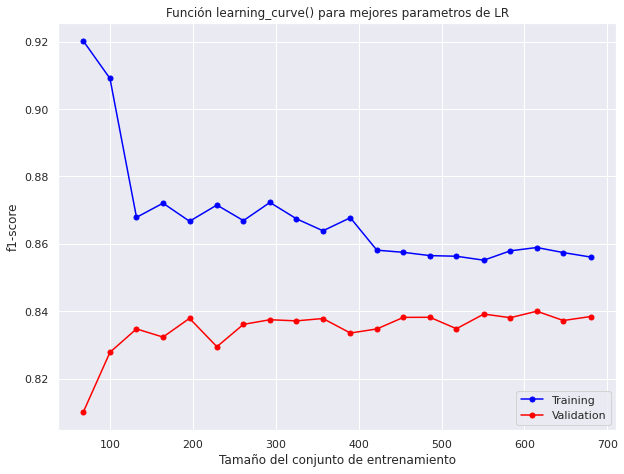

In [94]:
#obtenemos el modelo y los parametros
modeloLC_best = LogisticRegression(C=grid.best_params_['C'],class_weight=grid.best_params_['class_weight'],penalty=grid.best_params_['penalty'],solver=grid.best_params_['solver'],random_state=1)
cvLC = cv
#definimos los al menos 20 puntos de particion
delta_train_sz = np.linspace(0.1, 1.0, 20)
#obtenemos los datos de X transformados
Xx = columnasTransformer.fit_transform(Xtv)

#obtenemos la learning curve
train_sizes, train_scores, valid_scores = learning_curve(estimator=modeloLC_best, 
                                                        X=Xx, 
                                                        y=np.ravel(ytv),
                                                        cv=cvLC, 
                                                        train_sizes=delta_train_sz,
                                                        scoring=make_scorer(mi_f1score))

# Obtengamos la gráfica de las curvas de aprendizaje 
# cuando se incrementa el tamaño de la muestra:

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')

plt.plot(train_sizes, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función learning_curve() para mejores parametros de LR')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('f1-score')
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

La curva de trainign y de validation tienen únicamente una varianza entre ellas del 0.02, lo cual nos dice que no está sobreentrenado. Mientras que la métrica f1-score da un valor del 0.83844, lo cual nos dice que no es el mejor modelo, pero al correr el método de grid, y al ver que no esta sobrentrenado, concluimos que esa diferencia es el error irreducible.  

c) Para el modelo de árbol de decisión (decision tree) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “precision”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “precision”. ¿Cuál es la utilidad de la métrica “precision”? Incluye tus conclusiones. 

En base a la validation curve del decision tree, limitamos el parámetro de max_depth a 1-4. 

In [99]:
#obtenemos el modelo y los parametros
modeloDT_iter = DecisionTreeClassifier(random_state=1)
cvDT = cv

#criterion de 'log_loss' da error, aun no identificado el por que
dicc_grid2 = [{'ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100],'criterion':['gini','entropy'],
             'max_depth':[1,2,3,4],'min_samples_split':[2,3,4,5,6],'class_weight':['balanced', None]}]
             
grid2 = GridSearchCV(estimator=modeloDT_iter, 
                    param_grid=dicc_grid2, 
                    cv=cvDT, 
                    scoring=make_scorer(mi_precision),
                    error_score='raise')

In [100]:
# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(Xtv)

grid2.fit(Xx, np.ravel(ytv))

print('Mejor valor de precision obtenido con la mejor combinación:', grid2.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid2.best_params_)
print('Métrica utilizada:', grid2.scoring)

Mejor valor de precision obtenido con la mejor combinación: 0.8768881231872536
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.0001, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}
Métrica utilizada: make_scorer(mi_precision)


d) Con los mejores valores de los hiperparámetros encontrados con la métrica “precision” para el modelo de árbol de decisión, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.

Aunque max_depth nos arrojo un valor de 1, sabemos por la previa validation curve que el valor de 1 no es lo que buscamos. Por lo que graficamos ahora las learning curves con valores de max_depth de 1 a 3 para confirmarlo. 

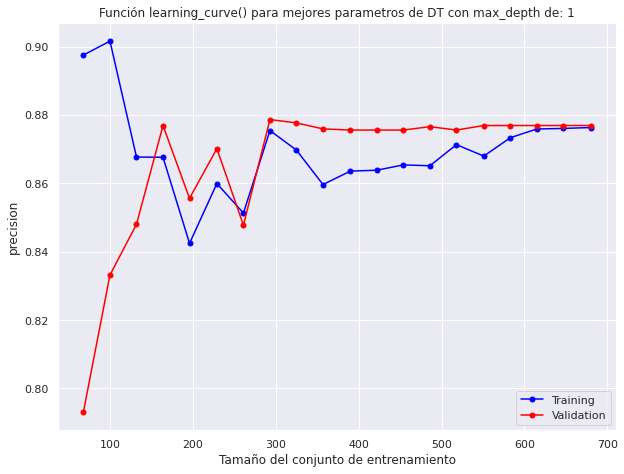

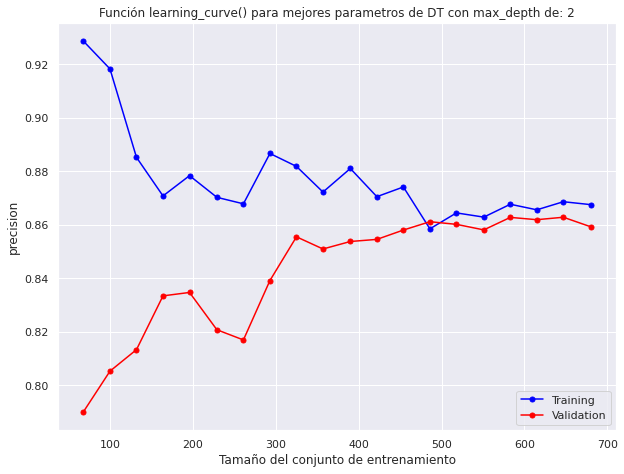

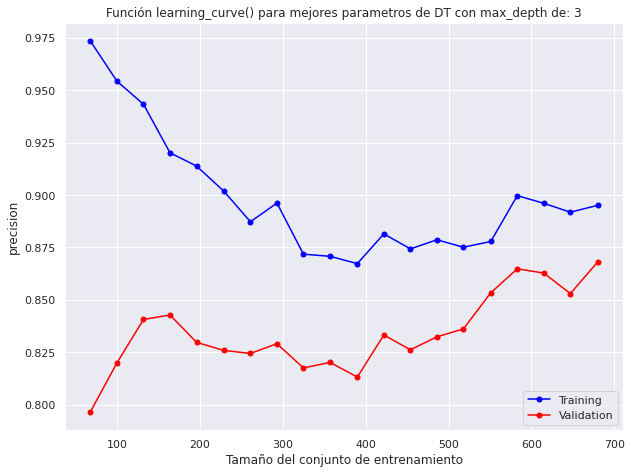

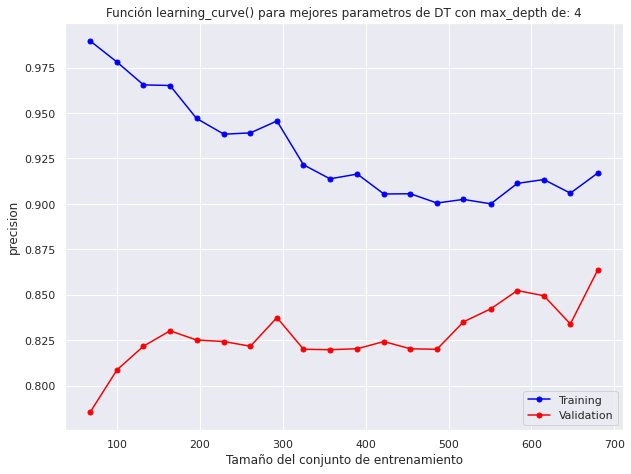

In [203]:
for i in range(1,5):

  #obtenemos el modelo y los parametros
  modeloDT_best = DecisionTreeClassifier(ccp_alpha=grid2.best_params_['ccp_alpha'],class_weight=grid2.best_params_['class_weight'],criterion=grid2.best_params_['criterion'],
                                        max_depth=i,min_samples_split=grid2.best_params_['min_samples_split'],random_state=1)
  cvLC = cv
  #definimos los al menos 20 puntos de particion
  delta_train_sz = np.linspace(0.1, 1.0, 20)
  #obtenemos los datos de X transformados
  Xx = columnasTransformer.fit_transform(Xtv)

  #obtenemos la learning curve
  train_sizes, train_scores, valid_scores = learning_curve(estimator=modeloDT_best, 
                                                          X=Xx, 
                                                          y=np.ravel(ytv),
                                                          cv=cvLC, 
                                                          train_sizes=delta_train_sz,
                                                          scoring=make_scorer(mi_precision))

  # Obtengamos la gráfica de las curvas de aprendizaje 
  # cuando se incrementa el tamaño de la muestra:

  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  valid_mean = np.mean(valid_scores, axis=1)
  valid_std = np.std(valid_scores, axis=1)

  plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')

  plt.plot(train_sizes, valid_mean, color='red', marker='o', markersize=5, label='Validation')

  plt.title('Función learning_curve() para mejores parametros de DT con max_depth de: ' + str(i))
  plt.xlabel('Tamaño del conjunto de entrenamiento')
  plt.ylabel('precision')
  plt.grid(b=True)
  plt.legend(loc='lower right')
  plt.show()

Donde observamos que efectivamente, para la primera grafica estamos obteniendo una curva de validación constante. Mientras que para la segunda tenemos un valor similar de precisión, y para la tercera este empieza a disminuir. Pero para la cuarta comienza a subir. Por lo que decidiremos quedarnos con max_depth de 4. 

e) Para el modelo de bosque aleatorio (random forest) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “recall”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “recall”. ¿Cuál es la utilidad de la métrica “recall”? Incluye tus conclusiones.  

NOTA: Toma en cuenta que el método de random forest pude tardar varios minutos en llevar a cabo  

In [118]:
#obtenemos el modelo y los parametros
modeloRF_iter = RandomForestClassifier(random_state=1)
cvDT = cv

#criterion de 'log_loss' da error, aun no identificado el por que
dicc_grid3 = [{'ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100],'criterion':['gini','entropy'],
             'max_depth':[1,2,3],'min_samples_split':[2,3,4,5,6],'class_weight':['balanced','balanced_subsample', None]}]
             
grid3 = GridSearchCV(estimator=modeloRF_iter, 
                    param_grid=dicc_grid3, 
                    cv=cvDT, 
                    scoring=make_scorer(mi_recall),
                    error_score='raise')

In [119]:
# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(Xtv)

grid3.fit(Xx, np.ravel(ytv))

print('Mejor valor de recall obtenido con la mejor combinación:', grid3.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid3.best_params_)
print('Métrica utilizada:', grid3.scoring)

Mejor valor de recall obtenido con la mejor combinación: 1.0
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.0001, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}
Métrica utilizada: make_scorer(mi_recall)


f) Con los mejores valores de los hiperparámetros encontrados con la métrica “recall” para el modelo de bosque aleatorio, obtener las curvas de validación (validation curve), incrementando la complejidad del modelo a través del hiperparámetro “max_depth” con al menos 10 valores. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento. 

Aunque obtuvimos un valor de recall igual a 1, sabemos que eso probablemente refiere a un modelo sobreentrenado. Observamos la gráfica. 

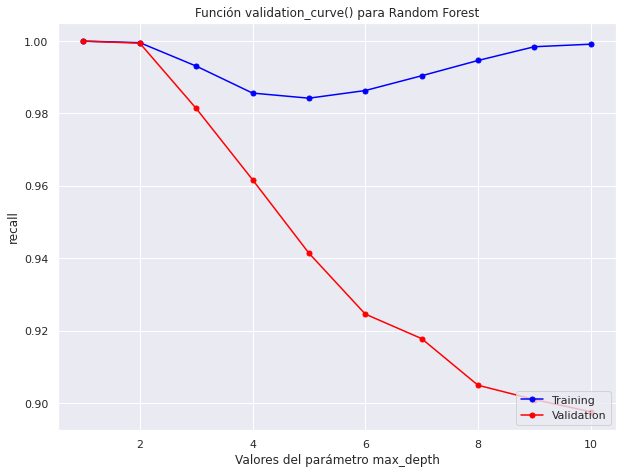

In [120]:
#obtenemos el modelo y los parametros de cross validation
modeloRF_best = RandomForestClassifier(ccp_alpha=grid3.best_params_['ccp_alpha'],class_weight=grid3.best_params_['class_weight'],criterion=grid3.best_params_['criterion'],
                                       max_depth=grid3.best_params_['max_depth'],min_samples_split=grid3.best_params_['min_samples_split'],random_state=1)
cvVC = cv

delta_max_depth = np.linspace(1, 10, 10)

train_scores, valid_scores = validation_curve(modeloRF_best, 
                                              Xx, 
                                              np.ravel(ytv), 
                                              param_name="max_depth", 
                                              param_range=delta_max_depth,
                                              cv=cvVC,
                                              scoring=make_scorer(mi_recall))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_max_depth, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_max_depth, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función validation_curve() para Random Forest')
plt.xlabel('Valores del parámetro max_depth')
plt.ylabel('recall')
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

La cual nos dice que con max_depth menor a 2, el modelo esta sobreentrenado, así como con max_depth mayor a 8. Generamos learning curves para obtener mejor información:

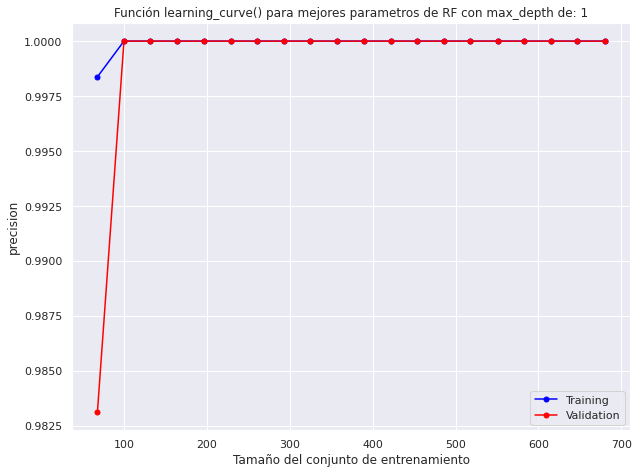

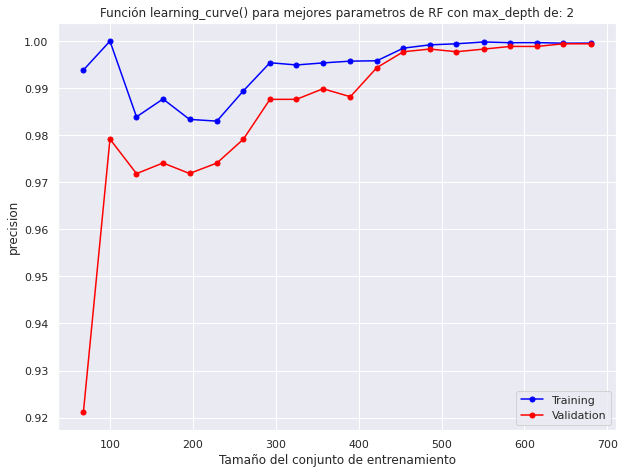

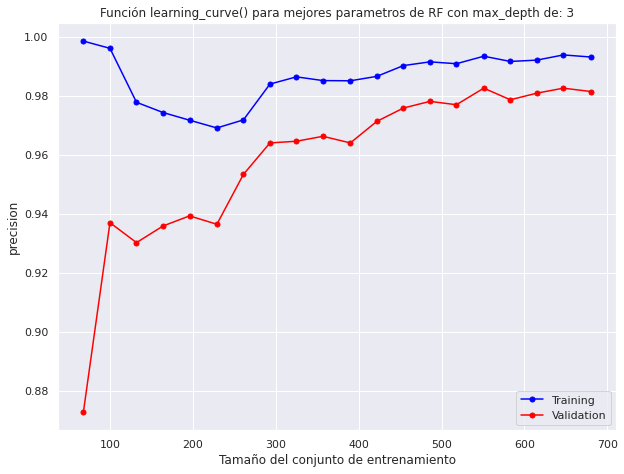

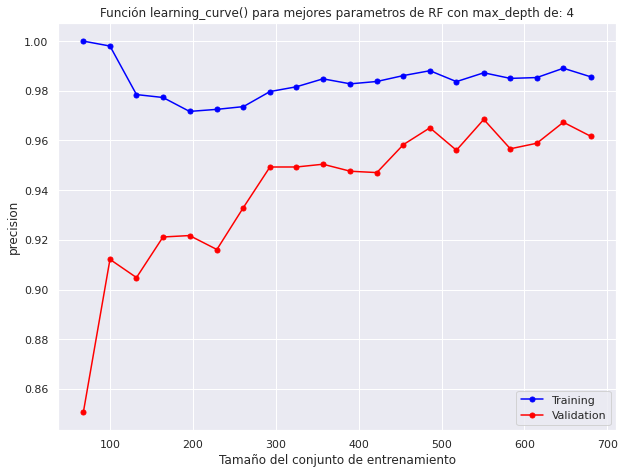

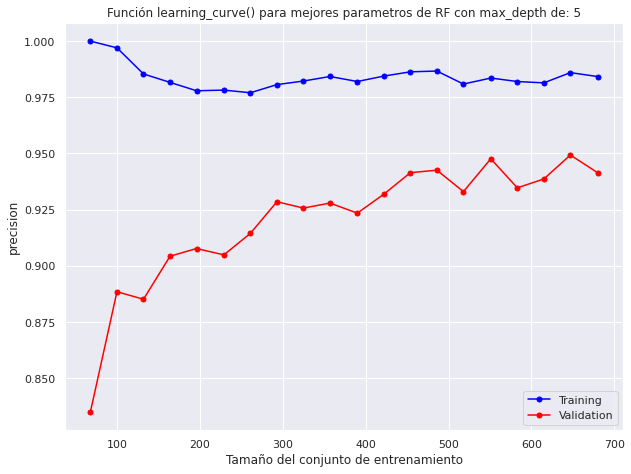

In [224]:
for i in range(1,6):

  #obtenemos el modelo y los parametros
  modeloRF_best = RandomForestClassifier(ccp_alpha=grid3.best_params_['ccp_alpha'],class_weight=grid3.best_params_['class_weight'],criterion=grid3.best_params_['criterion'],
                                       max_depth=i,min_samples_split=grid3.best_params_['min_samples_split'],random_state=1)
  cvLC = cv
  #definimos los al menos 20 puntos de particion
  delta_train_sz = np.linspace(0.1, 1.0, 20)

  #obtenemos la learning curve
  train_sizes, train_scores, valid_scores = learning_curve(estimator=modeloRF_best, 
                                                          X=Xx, 
                                                          y=np.ravel(ytv),
                                                          cv=cvLC, 
                                                          train_sizes=delta_train_sz,
                                                          scoring=make_scorer(mi_recall))

  # Obtengamos la gráfica de las curvas de aprendizaje 
  # cuando se incrementa el tamaño de la muestra:

  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  valid_mean = np.mean(valid_scores, axis=1)
  valid_std = np.std(valid_scores, axis=1)

  plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')

  plt.plot(train_sizes, valid_mean, color='red', marker='o', markersize=5, label='Validation')

  plt.title('Función learning_curve() para mejores parametros de RF con max_depth de: ' + str(i))
  plt.xlabel('Tamaño del conjunto de entrenamiento')
  plt.ylabel('precision')
  plt.grid(b=True)
  plt.legend(loc='lower right')
  plt.show()

Donde claramente podemos observar el modelo para max_depth de 1 y de 2 esta sobreentrenado. Mientras que para max_depth arriba de 3 disminuye su score de precision, lo cual colaboramos con la anterior grafica. Por lo que decidimos quedarnos con el parámetro de max_depth igual a 4. Lo que nos deja sin sobreentrenamiento del max_depth igual a 1, pero es previo al mismo parametro de valor 8 que sabemos que implica sobreentrenamiento.  

#**Ejercicio-6.**

6. Para cada uno de estos tres modelos, con las métricas que se consideraron en cada caso y usando el conjunto de Prueba que no has utilizado hasta ahora, obtener los modelos finales como se te indica a continuación. Deberás usar además como conjunto de entrenamiento el llamado modelo de entrenamiento “aumentado” que consiste en las datos que estuviste utilizando para entrenamiento y validación:  

a) Obtener el  modelo de regresión logística con los mejores parámetros que hayas encontrado con la métrica f1-score utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso. Incluir un gráfico del árbol de decisión final obtenido. 

In [139]:
modelRL_best = LogisticRegression(C=0.1,
                                  class_weight=None,
                                  penalty='l2',
                                  solver='liblinear',
                                  random_state=1)

# Entrenamos el modelo por última vez con los datos de entrenamiento
Xct = columnasTransformer.fit(Xtv)
Xxt = Xct.transform(Xtv)
modelRL_best.fit(Xxt, np.ravel(ytv))

# Transformamos los datos de prueba y los utilizamos por primera vez para obtener sus predicciones
# y desempeño del modelo:

Xxtest = Xct.transform(Xtest)
print('Accuracy:', mi_accuracy(np.ravel(ytest),modelRL_best.predict(Xxtest)))
print('Precision:', mi_precision(np.ravel(ytest),modelRL_best.predict(Xxtest)))
print('Recall:', mi_recall(np.ravel(ytest),modelRL_best.predict(Xxtest)))
print('f1-score', mi_f1score(np.ravel(ytest),modelRL_best.predict(Xxtest)))
print('gmean', mi_gmean(np.ravel(ytest),modelRL_best.predict(Xxtest)))

Accuracy: 0.7333333333333333
Precision: 0.7982456140350878
Recall: 0.8425925925925926
f1-score 0.8198198198198198
gmean 0.6173919658581353


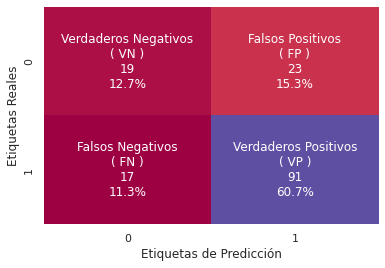

In [138]:
mi_cm(ytest,modelRL_best.predict(Xxtest))

Para la métrica de f1-score que se pide evaluar, podemos ver que tuvo un resultado de 0.82. Lo que nos dice que es un modelo decente. Considerando que en este caso lo que queremos evitar al banco es que le autoricen crédito a los clientes que no deberían de, el principal tipo de error que queremos evitar es el de falsos positivos. Podemos observar que el modelo de regresión linear obtenido da un 15.3% de falsos positivos para los valores de prueba. 

b) Obtener el  modelo de árbol de decisiones con los mejores parámetros que hayas encontrado con la métrica “precision” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso.  

Accuracy: 0.62
Precision: 0.8695652173913043
Recall: 0.5555555555555556
f1-score 0.6779661016949152
gmean 0.6606874726434099


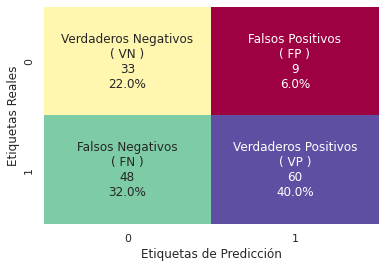

In [231]:
modelDT_best = DecisionTreeClassifier(ccp_alpha=0.0001,
                                  class_weight='balanced',
                                  criterion='gini',
                                  max_depth=4,
                                  min_samples_split=2)

# Entrenamos el modelo por última vez con los datos de entrenamiento
Xct = columnasTransformer.fit(Xtv)
Xxt = Xct.transform(Xtv)
modelDT_best.fit(Xxt, np.ravel(ytv))

# Transformamos los datos de prueba y los utilizamos por primera vez para obtener sus predicciones
# y desempeño del modelo:

Xxtest = Xct.transform(Xtest)
print('Accuracy:', mi_accuracy(np.ravel(ytest),modelDT_best.predict(Xxtest)))
print('Precision:', mi_precision(np.ravel(ytest),modelDT_best.predict(Xxtest)))
print('Recall:', mi_recall(np.ravel(ytest),modelDT_best.predict(Xxtest)))
print('f1-score', mi_f1score(np.ravel(ytest),modelDT_best.predict(Xxtest)))
print('gmean', mi_gmean(np.ravel(ytest),modelDT_best.predict(Xxtest)))
mi_cm(ytest,modelDT_best.predict(Xxtest))

Para la métrica de precision, podemos observar que da un valor de 0.87. Un valor para un modelo decente. En este caso podemos observar que el porcentaje de falsos positivos fue menor que el de falsos negativos, y sabemos que para este caso el que queremos disminuir es el de falsos positivos. 

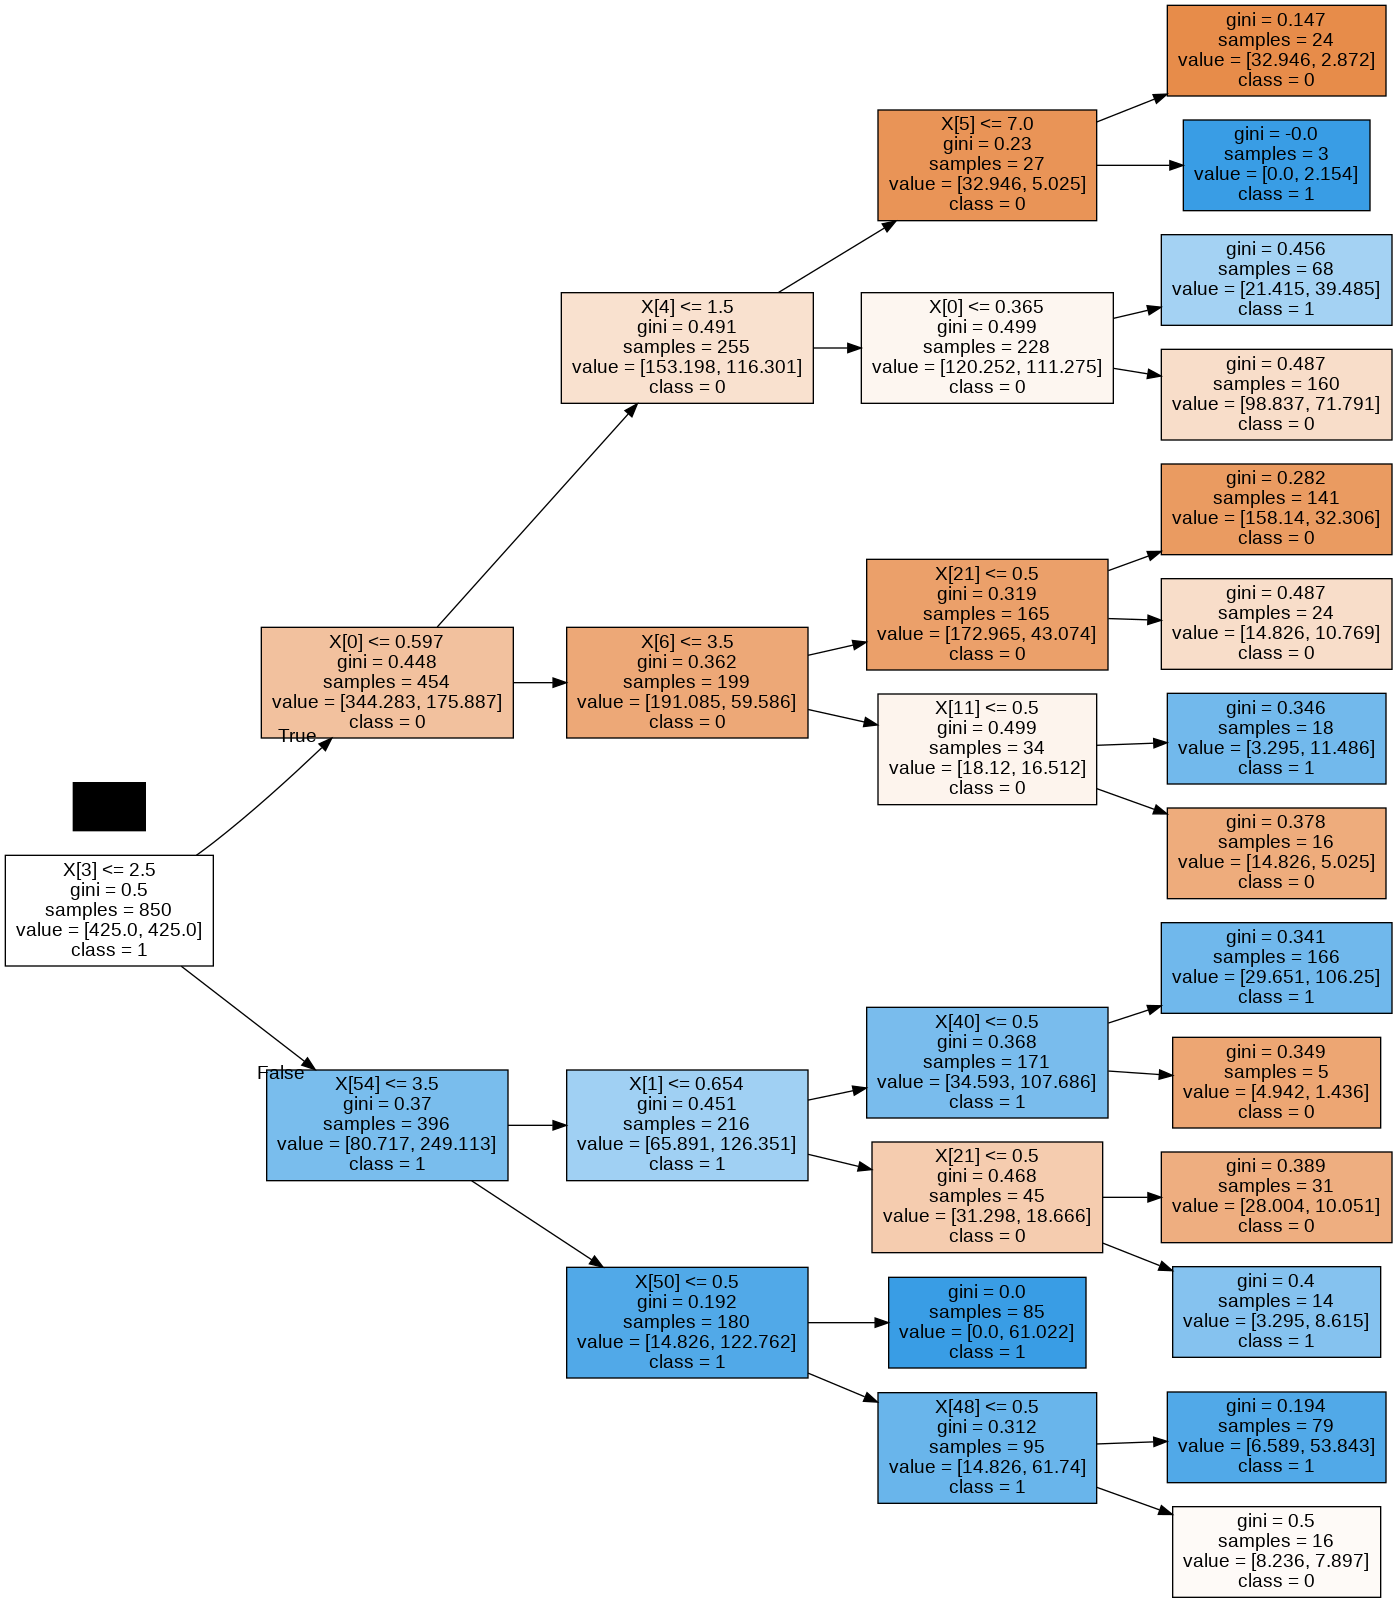

In [208]:
dot_data = tree.export_graphviz(decision_tree=modelDT_best, 
                                out_file=None,
                                max_depth=None,
                                feature_names=None,
                                class_names=['0', '1'],
                                filled=True,
                                rotate=True,
                                proportion=False)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

**PENDIENTE COMENTARIOS DEL MODELO**

c) Obtener el  modelo de bosque aleatorio con los mejores parámetros que hayas 
encontrado con la métrica “recall” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso. 

Accuracy: 0.7333333333333333
Precision: 0.7463768115942029
Recall: 0.9537037037037037
f1-score 0.8373983739837398
gmean 0.39868611373353674


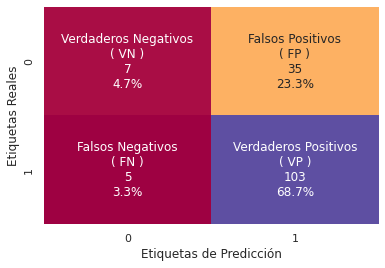

In [236]:
modelRF_best = RandomForestClassifier(ccp_alpha=0.0001,
                                  class_weight=None,
                                  criterion='gini',
                                  max_depth=4,
                                  min_samples_split=2)

# Entrenamos el modelo por última vez con los datos de entrenamiento
Xct = columnasTransformer.fit(Xtv)
Xxt = Xct.transform(Xtv)
modelRF_best.fit(Xxt, np.ravel(ytv))

# Transformamos los datos de prueba y los utilizamos por primera vez para obtener sus predicciones
# y desempeño del modelo:

Xxtest = Xct.transform(Xtest)
print('Accuracy:', mi_accuracy(np.ravel(ytest),modelRF_best.predict(Xxtest)))
print('Precision:', mi_precision(np.ravel(ytest),modelRF_best.predict(Xxtest)))
print('Recall:', mi_recall(np.ravel(ytest),modelRF_best.predict(Xxtest)))
print('f1-score', mi_f1score(np.ravel(ytest),modelRF_best.predict(Xxtest)))
print('gmean', mi_gmean(np.ravel(ytest),modelRF_best.predict(Xxtest)))
mi_cm(ytest,modelRF_best.predict(Xxtest))

Para la métrica de recall, podemos observar un valor casi igual a 1. Lo que nos dice que o el modelo es muy bueno, o que algo esta pasando. Si observamos la matriz de confusión, podemos observar que existe un 23.3% de falsos positivos (los que mas nos deben importar en este caso), y únicamente un 3.3% de falsos negativos. Esto nos dice que la métrica de recall no es la ideal para evaluar estos modelos, y que este modelo no es el mejor, ya que un 23.3% de errores en el mas significativo tipo de error no es lo que buscamos. 

###**Fin de la Actividad de la semana 6.**